In [15]:
import pandas as pd

# Read the Label.csv file
labels = pd.read_csv('../data/CICD/Label.csv')
# Read the Data.csv file
data = pd.read_csv('../data/CICD/Data.csv')




In [16]:
# Check for missing values in data
missing_values = data.isnull().sum()

# Display features with missing values (if any)
print("Features with missing values:")
print(missing_values[missing_values > 0])

# Calculate percentage of missing values
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Display features with missing values percentage
print("\nPercentage of missing values:")
print(missing_percentage[missing_percentage > 0])

# Get total number of missing values
total_missing = data.isnull().sum().sum()
print(f"\nTotal number of missing values: {total_missing}")

Features with missing values:
Series([], dtype: int64)

Percentage of missing values:
Series([], dtype: float64)

Total number of missing values: 0



Outliers in Flow Duration: 83652
Min: 1.00
Max: 119997527.00

Outliers in Total Fwd Packet: 72534
Min: 1.00
Max: 20038.00

Outliers in Total Bwd packets: 84920
Min: 0.00
Max: 11021.00

Outliers in Flow Bytes/s: 73815
Min: 0.00
Max: 1469000000.00

Outliers in Flow Packets/s: 22557
Min: 0.03
Max: 2000000.00

Outliers in Packet Length Mean: 20867
Min: 0.00
Max: 1474.67

Outliers in Average Packet Size: 22299
Min: 0.00
Max: 2212.00

Outliers in Flow IAT Mean: 69539
Min: 1.00
Max: 42185751.00


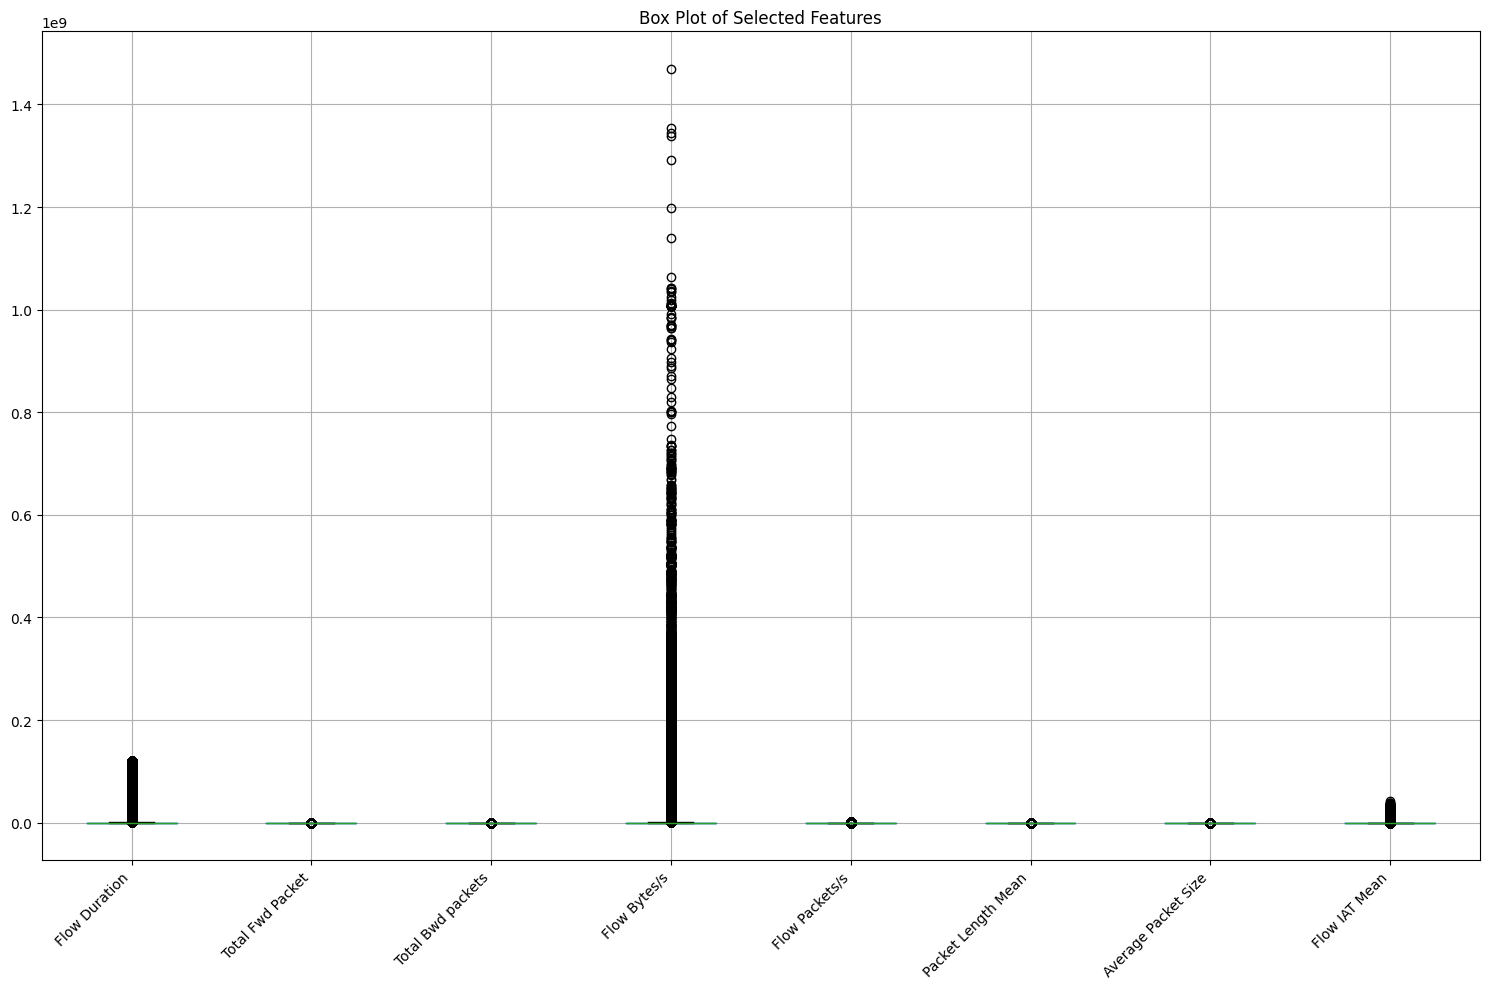

In [17]:
import seaborn as sns

import matplotlib.pyplot as plt

# Select some important numerical features
features_to_plot = [
    'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
    'Flow Bytes/s', 'Flow Packets/s', 'Packet Length Mean',
    'Average Packet Size', 'Flow IAT Mean'
]

# Create box plots
plt.figure(figsize=(15, 10))
data[features_to_plot].boxplot()
plt.xticks(rotation=45, ha='right')
plt.title('Box Plot of Selected Features')
plt.tight_layout()

# Print some statistics about outliers
for feature in features_to_plot:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = data[(data[feature] < Q1 - 1.5 * IQR) | (data[feature] > Q3 + 1.5 * IQR)].shape[0]
    print(f"\nOutliers in {feature}: {outlier_count}")
    print(f"Min: {data[feature].min():.2f}")
    print(f"Max: {data[feature].max():.2f}")

In [18]:
# Check for potential categorical features
categorical_like = []
numerical_features = []

for column in data.columns:
    # Check number of unique values
    n_unique = data[column].nunique()
    
    # If number of unique values is small (less than 10), it might be categorical
    if n_unique < 10:
        categorical_like.append({
            'column': column,
            'unique_values': sorted(data[column].unique()),
            'count': n_unique
        })
    else:
        numerical_features.append(column)

# Print potential categorical features
print("Potential categorical features:")
for feat in categorical_like:
    print(f"\n{feat['column']}:")
    print(f"Number of unique values: {feat['count']}")
    print(f"Unique values: {feat['unique_values']}")

print(f"\nNumber of numerical features: {len(numerical_features)}")

Potential categorical features:

Fwd PSH Flags:
Number of unique values: 2
Unique values: [np.int64(0), np.int64(1)]

Bwd PSH Flags:
Number of unique values: 1
Unique values: [np.int64(0)]

Fwd URG Flags:
Number of unique values: 1
Unique values: [np.int64(0)]

Bwd URG Flags:
Number of unique values: 1
Unique values: [np.int64(0)]

FIN Flag Count:
Number of unique values: 4
Unique values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]

SYN Flag Count:
Number of unique values: 9
Unique values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8), np.int64(10), np.int64(12)]

RST Flag Count:
Number of unique values: 2
Unique values: [np.int64(0), np.int64(1)]

URG Flag Count:
Number of unique values: 1
Unique values: [np.int64(0)]

CWR Flag Count:
Number of unique values: 1
Unique values: [np.int64(0)]

ECE Flag Count:
Number of unique values: 1
Unique values: [np.int64(0)]

Down/Up Ratio:
Number of unique values: 9
Unique values: [np.float64(0

In [ ]:
#Feature scaling and transformations

from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np

# Separate numerical features that need scaling
# Exclude categorical-like features and flags
features_to_scale = [col for col in numerical_features if col not in [f['column'] for f in categorical_like]]

# Create scalers
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Create copy of data to avoid modifying original
data_scaled = data.copy()

# Apply log transformation to highly skewed features with large ranges
skewed_features = ['Flow Duration', 'Flow Bytes/s', 'Flow Packets/s', 
                  'Flow IAT Mean', 'Flow IAT Max', 'Packet Length Variance']

for feature in skewed_features:
    # Add small constant to handle zeros
    data_scaled[feature] = np.log1p(data_scaled[feature].replace(0, 1e-6))

# Apply robust scaling to features with outliers
outlier_features = ['Packet Length Max', 'Fwd Packet Length Max', 
                   'Bwd Packet Length Max', 'Flow IAT Std']

data_scaled[outlier_features] = robust_scaler.fit_transform(data_scaled[outlier_features])

# Apply standard scaling to remaining numerical features
remaining_features = [f for f in features_to_scale 
                     if f not in skewed_features + outlier_features]

data_scaled[remaining_features] = standard_scaler.fit_transform(data_scaled[remaining_features])

print("Features scaled successfully")
print(f"Number of features transformed: {len(features_to_scale)}")

Features scaled successfully
Number of features transformed: 61


: 